#  Deep Learning Project with KC_House_dataset

## Import Library

In [4]:
import sys
'geopandas' in sys.modules

True

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.max_columns", None)

## Read Dataset

In [51]:
df = pd.read_csv("kc_house_data.csv")

# Data Preparation

In [19]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [52]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime(df['date'], format='%y%m%d')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


# Visulazations

## Show data on WorldMap

<AxesSubplot:xlabel='long', ylabel='lat'>

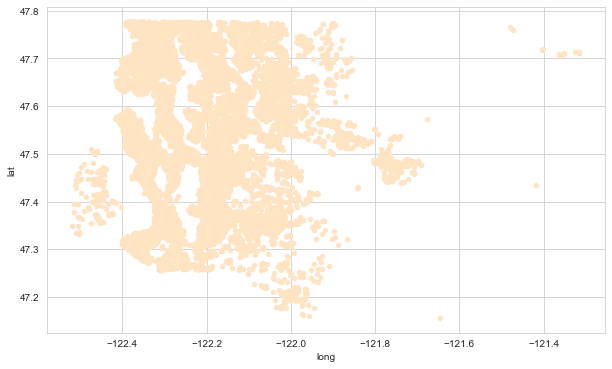

In [10]:
df.plot(x="long", y="lat", kind="scatter", c="bisque",
        colormap="YlOrRd")

In [11]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


<AxesSubplot:>

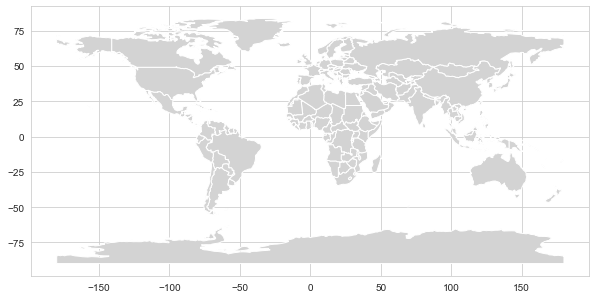

In [12]:
countries.plot(color="lightgrey")

<AxesSubplot:>

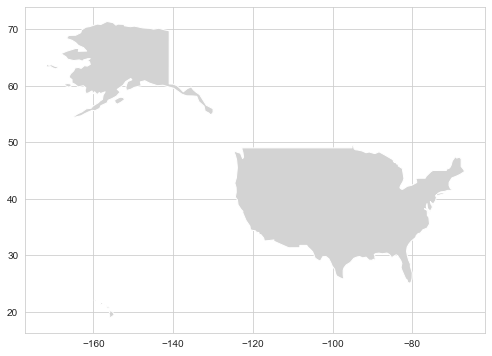

In [13]:
countries[countries["name"] == "United States of America"].plot(color = "lightgrey")

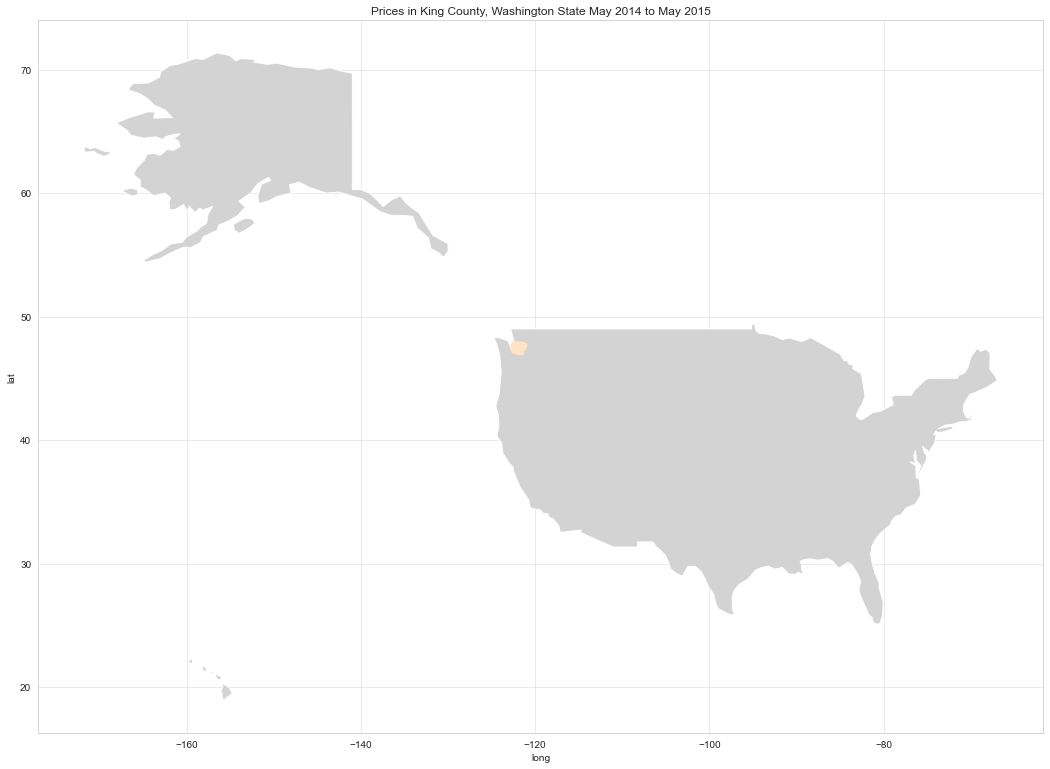

In [14]:
fig,ax = plt.subplots(figsize = (18,16))

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color = "lightgrey",ax=ax)

first_month = df["date"].min().strftime("%b %Y")
last_month = df["date"].max().strftime("%b %Y")

df.plot(x="long", y="lat", kind="scatter", c="bisque", colormap="YlOrRd",
       title = f'Prices in King County, Washington State {first_month} to {last_month}', ax=ax)

ax.grid(b=True, alpha=0.5)

plt.show()

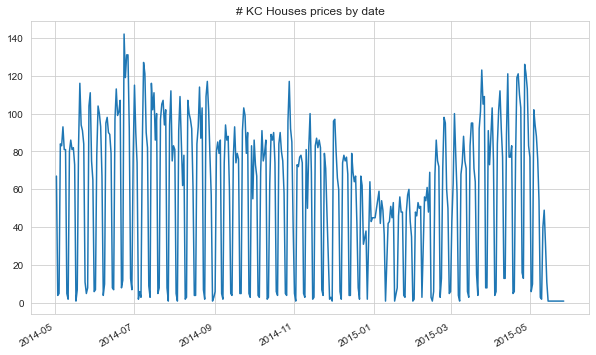

In [23]:
count_per_date = df["date"].value_counts().sort_index()
count_per_date.plot(title="# KC Houses prices by date")
plt.show()

# Statistical Analysis

In [24]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000,-0.017,0.001,0.005,-0.012,-0.132,0.019,-0.003,0.012,-0.024,0.008,-0.011,-0.005,0.022,-0.017,-0.008,-0.002,0.021,-0.003,-0.139
price,-0.017,1.000,0.309,0.526,0.702,0.090,0.257,0.266,0.397,0.036,0.668,0.605,0.324,0.054,0.126,-0.053,0.307,0.022,0.585,0.083
bedrooms,0.001,0.309,1.000,0.515,0.578,0.032,0.178,-0.007,0.080,0.026,0.357,0.479,0.303,0.156,0.018,-0.154,-0.010,0.132,0.393,0.031
bathrooms,0.005,0.526,0.515,1.000,0.756,0.088,0.503,0.064,0.188,-0.126,0.666,0.687,0.283,0.507,0.051,-0.205,0.024,0.225,0.570,0.088
sqft_living,-0.012,0.702,0.578,0.756,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.876,0.435,0.318,0.055,-0.200,0.052,0.241,0.756,0.184
sqft_lot,-0.132,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.115,0.184,0.015,0.053,0.008,-0.130,-0.086,0.230,0.145,0.718
floors,0.019,0.257,0.178,0.503,0.354,-0.005,1.000,0.024,0.029,-0.264,0.459,0.524,-0.246,0.489,0.006,-0.060,0.049,0.126,0.280,-0.011
waterfront,-0.003,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.026,0.093,0.030,-0.014,-0.042,0.087,0.031
view,0.012,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.252,0.168,0.277,-0.054,0.104,0.085,0.006,-0.078,0.281,0.073
condition,-0.024,0.036,0.026,-0.126,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.147,-0.159,0.174,-0.362,-0.061,0.003,-0.015,-0.106,-0.093,-0.003


In [ ]:
#sns.heatmap(df.drop(["date"],axis=1))

In [ ]:
#sns.pairplot(df.drop(["date"],axis=1))

# Determine Dependent and Independent Variables

In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,2720,8062
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,1800,7503


In [53]:
df = df.drop(["id","date","lat","long","zipcode"],axis=1)

In [54]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [195]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15']].values
y = df["price"].values

In [33]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 0.000e+00, 1.340e+03,
        5.650e+03],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 1.991e+03, 1.690e+03,
        7.639e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 0.000e+00, 2.720e+03,
        8.062e+03],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 0.000e+00, 1.020e+03,
        2.007e+03],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 0.000e+00, 1.410e+03,
        1.287e+03],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 0.000e+00, 1.020e+03,
        1.357e+03]])

In [66]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [35]:
y.shape

(21597,)

## Train - Test Split

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)

In [95]:
X_train.shape

(20085, 15)

In [96]:
X_test.shape

(1512, 15)

In [39]:
y_train.shape

(19437,)

In [40]:
y_test.shape

(2160,)

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [197]:
scaler = MinMaxScaler()

In [198]:
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)


In [221]:
X_test = scaler.transform(X_test)

In [145]:
X_train.max()

1.0

In [173]:
X_train.min()

0.0

## Use ANN with Def Functions and Tensorflow


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [199]:
model = Sequential()
model.add(Dense(units=8, activation = "relu"))
model.add(Dense(units=8, activation = "relu"))
model.add(Dense(units=8, activation = "relu"))
model.add(Dense(units=8, activation = "relu"))
model.add(Dense(units=1))

In [200]:
model.compile(optimizer="adam",loss ="mse")

In [201]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=500)

Epoch 1/500
159/159 [==============================] - 1s 3ms/step - loss: 427978850304.0000
Epoch 2/500
159/159 [==============================] - 0s 3ms/step - loss: 427883003904.0000
Epoch 3/500
159/159 [==============================] - 0s 3ms/step - loss: 426829053952.0000
Epoch 4/500
159/159 [==============================] - 0s 3ms/step - loss: 421817810944.0000
Epoch 5/500
159/159 [==============================] - 0s 3ms/step - loss: 406855155712.0000
Epoch 6/500
159/159 [==============================] - 0s 3ms/step - loss: 374035152896.0000
Epoch 7/500
159/159 [==============================] - 0s 3ms/step - loss: 318128029696.0000
Epoch 8/500
159/159 [==============================] - 0s 3ms/step - loss: 243501776896.0000
Epoch 9/500
159/159 [==============================] - 0s 3ms/step - loss: 168917549056.0000
Epoch 10/500
159/159 [==============================] - 1s 3ms/step - loss: 118680469504.0000
Epoch 11/500
159/159 [==============================] - 0s 3ms/step -

159/159 [==============================] - 0s 3ms/step - loss: 51081428992.0000
Epoch 89/500
159/159 [==============================] - 0s 2ms/step - loss: 50975592448.0000
Epoch 90/500
159/159 [==============================] - 0s 3ms/step - loss: 50903506944.0000
Epoch 91/500
159/159 [==============================] - 0s 3ms/step - loss: 50810445824.0000
Epoch 92/500
159/159 [==============================] - 0s 3ms/step - loss: 50732584960.0000
Epoch 93/500
159/159 [==============================] - 0s 3ms/step - loss: 50651168768.0000
Epoch 94/500
159/159 [==============================] - 0s 3ms/step - loss: 50569830400.0000
Epoch 95/500
159/159 [==============================] - 0s 3ms/step - loss: 50501742592.0000
Epoch 96/500
159/159 [==============================] - 0s 3ms/step - loss: 50432806912.0000
Epoch 97/500
159/159 [==============================] - 0s 2ms/step - loss: 50377117696.0000
Epoch 98/500
159/159 [==============================] - 0s 3ms/step - loss: 5031010

159/159 [==============================] - 0s 2ms/step - loss: 45598867456.0000
Epoch 176/500
159/159 [==============================] - 0s 3ms/step - loss: 45575917568.0000
Epoch 177/500
159/159 [==============================] - 0s 3ms/step - loss: 45517594624.0000
Epoch 178/500
159/159 [==============================] - 0s 3ms/step - loss: 45479034880.0000
Epoch 179/500
159/159 [==============================] - 0s 2ms/step - loss: 45456068608.0000
Epoch 180/500
159/159 [==============================] - 0s 2ms/step - loss: 45390811136.0000
Epoch 181/500
159/159 [==============================] - 0s 3ms/step - loss: 45355835392.0000
Epoch 182/500
159/159 [==============================] - 0s 3ms/step - loss: 45292232704.0000
Epoch 183/500
159/159 [==============================] - 0s 3ms/step - loss: 45286342656.0000
Epoch 184/500
159/159 [==============================] - 0s 3ms/step - loss: 45225881600.0000
Epoch 185/500
159/159 [==============================] - 0s 3ms/step - los

159/159 [==============================] - 0s 3ms/step - loss: 41503612928.0000
Epoch 263/500
159/159 [==============================] - 0s 3ms/step - loss: 41470824448.0000
Epoch 264/500
159/159 [==============================] - 0s 3ms/step - loss: 41444859904.0000
Epoch 265/500
159/159 [==============================] - 0s 3ms/step - loss: 41430302720.0000
Epoch 266/500
159/159 [==============================] - 0s 3ms/step - loss: 41409585152.0000
Epoch 267/500
159/159 [==============================] - 0s 3ms/step - loss: 41368449024.0000
Epoch 268/500
159/159 [==============================] - 0s 3ms/step - loss: 41343143936.0000
Epoch 269/500
159/159 [==============================] - 0s 3ms/step - loss: 41318244352.0000
Epoch 270/500
159/159 [==============================] - 0s 3ms/step - loss: 41305554944.0000
Epoch 271/500
159/159 [==============================] - 0s 3ms/step - loss: 41266343936.0000
Epoch 272/500
159/159 [==============================] - 0s 3ms/step - los

159/159 [==============================] - 0s 3ms/step - loss: 39904907264.0000
Epoch 350/500
159/159 [==============================] - 0s 3ms/step - loss: 39895535616.0000
Epoch 351/500
159/159 [==============================] - 0s 3ms/step - loss: 39914086400.0000
Epoch 352/500
159/159 [==============================] - 0s 3ms/step - loss: 39868035072.0000
Epoch 353/500
159/159 [==============================] - 0s 3ms/step - loss: 39874912256.0000
Epoch 354/500
159/159 [==============================] - 1s 4ms/step - loss: 39848415232.0000
Epoch 355/500
159/159 [==============================] - 0s 3ms/step - loss: 39857262592.0000
Epoch 356/500
159/159 [==============================] - 0s 3ms/step - loss: 39820988416.0000
Epoch 357/500
159/159 [==============================] - 0s 3ms/step - loss: 39813353472.0000
Epoch 358/500
159/159 [==============================] - 0s 3ms/step - loss: 39816060928.0000
Epoch 359/500
159/159 [==============================] - 1s 3ms/step - los

159/159 [==============================] - 1s 3ms/step - loss: 38933327872.0000
Epoch 437/500
159/159 [==============================] - 1s 3ms/step - loss: 38920470528.0000
Epoch 438/500
159/159 [==============================] - 1s 3ms/step - loss: 38933274624.0000
Epoch 439/500
159/159 [==============================] - 0s 3ms/step - loss: 38897451008.0000
Epoch 440/500
159/159 [==============================] - 1s 3ms/step - loss: 38908006400.0000
Epoch 441/500
159/159 [==============================] - 1s 3ms/step - loss: 38895943680.0000
Epoch 442/500
159/159 [==============================] - 0s 3ms/step - loss: 38886453248.0000
Epoch 443/500
159/159 [==============================] - 1s 3ms/step - loss: 38873686016.0000
Epoch 444/500
159/159 [==============================] - 1s 4ms/step - loss: 38862921728.0000
Epoch 445/500
159/159 [==============================] - 0s 3ms/step - loss: 38864556032.0000
Epoch 446/500
159/159 [==============================] - 0s 3ms/step - los

In [203]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 8)                 128       
                                                                 
 dense_138 (Dense)           (None, 8)                 72        
                                                                 
 dense_139 (Dense)           (None, 8)                 72        
                                                                 
 dense_140 (Dense)           (None, 8)                 72        
                                                                 
 dense_141 (Dense)           (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [204]:
model.weights

[<tf.Variable 'dense_137/kernel:0' shape=(15, 8) dtype=float32, numpy=
 array([[-6.44714308e+00, -5.17419624e+00, -7.11763525e+00,
         -4.69825459e+00, -3.16433072e-01, -7.10880518e+00,
         -7.57135105e+00, -7.52139425e+00],
        [ 2.26425385e+00,  4.62769175e+00,  1.80273247e+00,
          4.57231903e+00,  6.77400231e-02,  1.86956894e+00,
          1.49471748e+00,  1.85830319e+00],
        [ 3.70769000e+00,  7.21729994e+00,  4.20867777e+00,
          9.06626797e+00, -5.06690264e-01,  4.29104567e+00,
          3.93425012e+00,  4.46229982e+00],
        [ 1.56646168e+00, -1.31136408e+01,  2.25059342e+00,
         -1.35837870e+01, -4.63045239e-01,  1.97868681e+00,
          1.80267918e+00, -2.65402246e+00],
        [ 5.74346304e-01, -1.64445186e+00,  9.57992017e-01,
         -3.00078392e+00,  8.61850977e-02,  1.04597390e+00,
          8.16701591e-01, -2.74033010e-01],
        [ 2.23522925e+00,  2.41639376e+00,  1.95778680e+00,
          4.20054197e+00, -2.76703000e-01,  2.058

In [205]:
model.history.history

{'loss': [427978850304.0,
  427883003904.0,
  426829053952.0,
  421817810944.0,
  406855155712.0,
  374035152896.0,
  318128029696.0,
  243501776896.0,
  168917549056.0,
  118680469504.0,
  98576621568.0,
  93775069184.0,
  92546367488.0,
  91740962816.0,
  90934124544.0,
  90118684672.0,
  89287983104.0,
  88420466688.0,
  87537491968.0,
  86627729408.0,
  85696282624.0,
  84765433856.0,
  83781255168.0,
  82795724800.0,
  81785208832.0,
  80808542208.0,
  79741460480.0,
  78693269504.0,
  77650411520.0,
  76595535872.0,
  75517321216.0,
  74474717184.0,
  73405734912.0,
  72354152448.0,
  71303815168.0,
  70270132224.0,
  69264539648.0,
  68259655680.0,
  67306471424.0,
  66395000832.0,
  65512394752.0,
  64659902464.0,
  63859585024.0,
  63117787136.0,
  62405505024.0,
  61718753280.0,
  61083795456.0,
  60484710400.0,
  59945435136.0,
  59430612992.0,
  58944774144.0,
  58493423616.0,
  58095153152.0,
  57668116480.0,
  57294598144.0,
  56939180032.0,
  56629686272.0,
  56303931392

<AxesSubplot:>

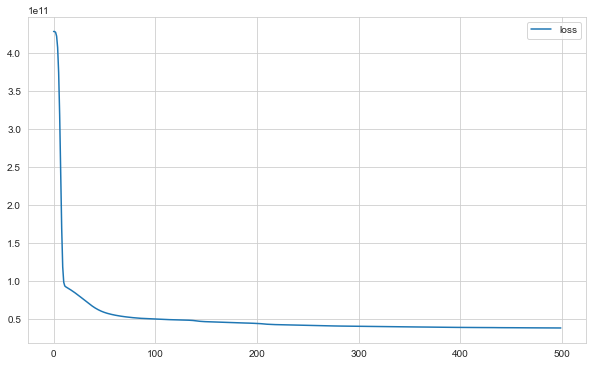

In [206]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 500000000000.0)

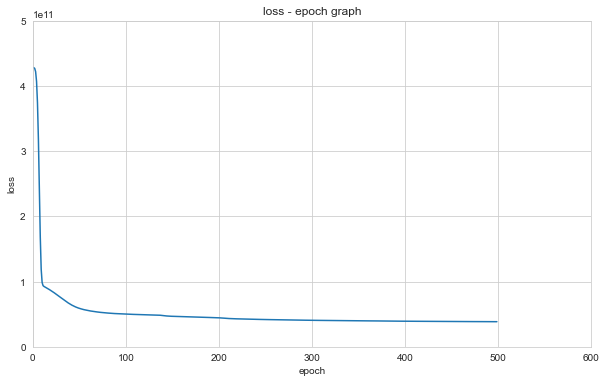

In [267]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 600]) # focusing on the given x values
ax.set_ylim([0, 5e11])

## Evaluate Models

In [208]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [211]:
model.evaluate(X_train, y_train, verbose=0)

38449205248.0

In [212]:
model.evaluate(X_test,y_test,verbose=0)

2.831113358858099e+19

In [222]:
y_pred = model.predict(X_test)

In [223]:
explained_variance_score(y_test, y_pred)

0.6791872490061645

In [224]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
8,445000.000,459515.719
555,1570000.000,818103.562
311,350000.000,396676.438
57,349900.000,380668.438
188,185000.000,373077.594
898,210000.000,303209.406
724,420000.000,414156.938
579,1020000.000,873871.000
543,230000.000,342835.000
942,288000.000,518275.062


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

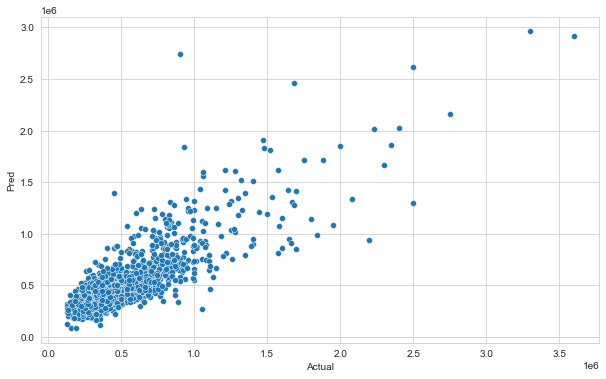

In [225]:
sns.scatterplot(x = "Actual", y = "Pred", data = compare)

In [226]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [227]:
eval_metric(y_test, y_pred)

r2_score: 0.6791484753000958 
mae: 132784.10801263503 
mse: 37847975875.27121 
rmse: 194545.56246615137


## Deployment Model and Predict Fake Data

In [230]:
scaler = MinMaxScaler().fit(X)

In [231]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg","wb"))

In [232]:
X_scaled = scaler.transform(X)

In [233]:
final_model = Sequential()
final_model.add(Dense(units=8, activation="relu"))
final_model.add(Dense(units=8, activation="relu"))
final_model.add(Dense(units=8, activation="relu"))
final_model.add(Dense(units=8, activation="relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "adam", loss = "mse")

final_model.fit(x=X_scaled, y=y, batch_size=128, epochs=500) 

Epoch 1/500
169/169 [==============================] - 2s 3ms/step - loss: 426871619584.0000
Epoch 2/500
169/169 [==============================] - 0s 3ms/step - loss: 426730520576.0000
Epoch 3/500
169/169 [==============================] - 0s 3ms/step - loss: 424936833024.0000
Epoch 4/500
169/169 [==============================] - 1s 3ms/step - loss: 416145080320.0000
Epoch 5/500
169/169 [==============================] - 1s 3ms/step - loss: 390268944384.0000
Epoch 6/500
169/169 [==============================] - 1s 3ms/step - loss: 336180346880.0000
Epoch 7/500
169/169 [==============================] - 0s 3ms/step - loss: 252128591872.0000
Epoch 8/500
169/169 [==============================] - 0s 3ms/step - loss: 164148789248.0000
Epoch 9/500
169/169 [==============================] - 0s 3ms/step - loss: 110438440960.0000
Epoch 10/500
169/169 [==============================] - 0s 3ms/step - loss: 94425464832.0000
Epoch 11/500
169/169 [==============================] - 0s 3ms/step - 

169/169 [==============================] - 0s 3ms/step - loss: 47109136384.0000
Epoch 90/500
169/169 [==============================] - 1s 3ms/step - loss: 47025659904.0000
Epoch 91/500
169/169 [==============================] - 0s 3ms/step - loss: 46932164608.0000
Epoch 92/500
169/169 [==============================] - 1s 3ms/step - loss: 46859087872.0000
Epoch 93/500
169/169 [==============================] - 0s 3ms/step - loss: 46764740608.0000
Epoch 94/500
169/169 [==============================] - 1s 3ms/step - loss: 46665576448.0000
Epoch 95/500
169/169 [==============================] - 1s 3ms/step - loss: 46609244160.0000
Epoch 96/500
169/169 [==============================] - 1s 3ms/step - loss: 46523707392.0000
Epoch 97/500
169/169 [==============================] - 1s 4ms/step - loss: 46473293824.0000
Epoch 98/500
169/169 [==============================] - 1s 4ms/step - loss: 46357389312.0000
Epoch 99/500
169/169 [==============================] - 1s 5ms/step - loss: 4630562

169/169 [==============================] - 1s 4ms/step - loss: 42416332800.0000A: 0s - loss: 41635717120.00
Epoch 176/500
169/169 [==============================] - 1s 3ms/step - loss: 42396536832.0000
Epoch 177/500
169/169 [==============================] - 1s 3ms/step - loss: 42355912704.0000
Epoch 178/500
169/169 [==============================] - 1s 3ms/step - loss: 42316668928.0000A: 0s - loss: 41853276160.
Epoch 179/500
169/169 [==============================] - 0s 3ms/step - loss: 42303578112.0000
Epoch 180/500
169/169 [==============================] - 0s 3ms/step - loss: 42248728576.0000
Epoch 181/500
169/169 [==============================] - 1s 3ms/step - loss: 42213490688.0000
Epoch 182/500
169/169 [==============================] - 1s 3ms/step - loss: 42189086720.0000
Epoch 183/500
169/169 [==============================] - 1s 3ms/step - loss: 42141925376.0000
Epoch 184/500
169/169 [==============================] - 1s 4ms/step - loss: 42116947968.0000
Epoch 185/500
169/16

169/169 [==============================] - 0s 2ms/step - loss: 39963303936.0000
Epoch 262/500
169/169 [==============================] - 0s 2ms/step - loss: 39948648448.0000
Epoch 263/500
169/169 [==============================] - 0s 3ms/step - loss: 39922724864.0000
Epoch 264/500
169/169 [==============================] - 0s 3ms/step - loss: 39927910400.0000
Epoch 265/500
169/169 [==============================] - 0s 3ms/step - loss: 39909847040.0000
Epoch 266/500
169/169 [==============================] - 0s 2ms/step - loss: 39895101440.0000
Epoch 267/500
169/169 [==============================] - 0s 2ms/step - loss: 39886643200.0000
Epoch 268/500
169/169 [==============================] - 0s 2ms/step - loss: 39871238144.0000
Epoch 269/500
169/169 [==============================] - 0s 2ms/step - loss: 39885582336.0000
Epoch 270/500
169/169 [==============================] - 0s 2ms/step - loss: 39862009856.0000
Epoch 271/500
169/169 [==============================] - 0s 2ms/step - los

169/169 [==============================] - 0s 3ms/step - loss: 39168978944.0000
Epoch 349/500
169/169 [==============================] - 0s 3ms/step - loss: 39181529088.0000
Epoch 350/500
169/169 [==============================] - 0s 3ms/step - loss: 39156150272.0000
Epoch 351/500
169/169 [==============================] - 1s 3ms/step - loss: 39173664768.0000
Epoch 352/500
169/169 [==============================] - 1s 3ms/step - loss: 39142060032.0000
Epoch 353/500
169/169 [==============================] - 1s 3ms/step - loss: 39149899776.0000
Epoch 354/500
169/169 [==============================] - 0s 3ms/step - loss: 39134326784.0000
Epoch 355/500
169/169 [==============================] - 1s 3ms/step - loss: 39137226752.0000
Epoch 356/500
169/169 [==============================] - 1s 3ms/step - loss: 39133741056.0000
Epoch 357/500
169/169 [==============================] - 0s 3ms/step - loss: 39116578816.0000
Epoch 358/500
169/169 [==============================] - 1s 3ms/step - los

169/169 [==============================] - 0s 3ms/step - loss: 38602698752.0000
Epoch 436/500
169/169 [==============================] - 1s 3ms/step - loss: 38558875648.0000
Epoch 437/500
169/169 [==============================] - 0s 3ms/step - loss: 38617202688.0000
Epoch 438/500
169/169 [==============================] - 0s 3ms/step - loss: 38558044160.0000
Epoch 439/500
169/169 [==============================] - 0s 3ms/step - loss: 38568706048.0000
Epoch 440/500
169/169 [==============================] - 0s 3ms/step - loss: 38572072960.0000
Epoch 441/500
169/169 [==============================] - 1s 3ms/step - loss: 38552227840.0000
Epoch 442/500
169/169 [==============================] - 0s 2ms/step - loss: 38539096064.0000
Epoch 443/500
169/169 [==============================] - 0s 3ms/step - loss: 38538694656.0000
Epoch 444/500
169/169 [==============================] - 0s 3ms/step - loss: 38523895808.0000
Epoch 445/500
169/169 [==============================] - 0s 3ms/step - los

In [234]:
from tensorflow.keras.models import load_model

In [235]:
model.save("model_fake_reg.h5")

## Prediction

In [240]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [241]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,2720,8062
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,1800,7503


In [273]:
my_dict = {'bedrooms': [4,2,3,1], 'bathrooms':[2,1,0,3], 'sqft_living':[1132,1223,657,745], 'sqft_lot':[4023,2321,7898,3234]
           , 'floors':[2,3,4,5],
       'waterfront':[0,1,2,3], 'view':[0,1,2,3], 'condition':[2,4,7,6], 'grade':[7,4,6,2], 'sqft_above':[900,250,759,230],
       'sqft_basement':[0,250,900,323], 'yr_built':[1945,1987,1967,1998], 'yr_renovated':[0,1993,1999,2007],
           'sqft_living15':[2332,443,1780,433],
       'sqft_lot15':[4433,2345,2234,7865]}

In [274]:
sample = pd.DataFrame(my_dict)
sample

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,4,2,1132,4023,2,0,0,2,7,900,0,1945,0,2332,4433
1,2,1,1223,2321,3,1,1,4,4,250,250,1987,1993,443,2345
2,3,0,657,7898,4,2,2,7,6,759,900,1967,1999,1780,2234
3,1,3,745,3234,5,3,3,6,2,230,323,1998,2007,433,7865


In [275]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[ 9.37500000e-02,  2.00000000e-01,  5.78587699e-02,
         2.12195132e-03,  4.00000000e-01,  0.00000000e+00,
         0.00000000e+00,  2.50000000e-01,  4.00000000e-01,
         5.86283186e-02,  0.00000000e+00,  3.91304348e-01,
         0.00000000e+00,  3.32644984e-01,  4.34438498e-03],
       [ 3.12500000e-02,  6.66666667e-02,  6.47684131e-02,
         1.09096041e-03,  8.00000000e-01,  1.00000000e+00,
         2.50000000e-01,  7.50000000e-01,  1.00000000e-01,
        -1.32743363e-02,  5.18672199e-02,  7.56521739e-01,
         9.89081886e-01,  7.57184650e-03,  1.94589851e-03],
       [ 6.25000000e-02, -6.66666667e-02,  2.17919514e-02,
         4.46924261e-03,  1.20000000e+00,  2.00000000e+00,
         5.00000000e-01,  1.50000000e+00,  3.00000000e-01,
         4.30309735e-02,  1.86721992e-01,  5.82608696e-01,
         9.92059553e-01,  2.37652728e-01,  1.81839276e-03],
       [ 0.00000000e+00,  3.33333333e-01,  2.84738041e-02,
         1.64401253e-03,  1.60000000e+00,  3.00000000

In [276]:
fake_pred = model_fake_reg.predict(sample_scaled)

In [277]:
pd.DataFrame(fake_pred)

,0
0,356923.062
1,275929.281
2,909500.375
3,705400.125
